In [136]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam 
from tensorflow import keras

In [137]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [138]:
#Vamos a armar una Capa personalizada que será la unidad residual de Resnet que acabamos de explicar
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides = 1, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides = strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers=[]
        if strides > 1:
            self.skip_layers=[
                DefaultConv2D(filters, kernel_size = 1, strides=strides),
                keras.layers.BatchNormalization()]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [139]:
model = tf.keras.models.load_model('./models/object_detection_brasil_b_50_v2.h5') ##object_detection_brasil_b_50_v2  object_detection_brasil_b_80
print('model loaded sucessfully')

model loaded sucessfully


In [435]:
path = './test_images/N12.jpeg'
path = './test_images/N66.jpeg'
path = './test_images/test1.jpeg'
#path = './brasil/monitoring_system_1221.JPG'
#path = './brasil/monitoring_system_1222.JPG'
path = './brasil/monitoring_system_1223.JPG'
path = './brasil/monitoring_system_1224.JPG'
#path = './brasil/cropped_parking_lot_154.JPG'
#path = './brasil/cropped_parking_lot_155.JPG'
#path = './brasil/cropped_parking_lot_156.JPG'
#path = './brasil/cropped_parking_lot_157.JPG'
#path = './brasil/cropped_parking_lot_158.JPG'
#path = './brasil/cropped_parking_lot_159.JPG'
#path = './brasil/parking_lot1_108.JPG'
#path = './brasil/parking_lot1_109.JPG'
#path = './brasil/parking_lot1_110.JPG'
#path = './brasil/parking_lot1_111.JPG'
#path = './brasil/parking_lot1_515.JPG'
#path = './brasil/parking_lot1_516.JPG'
image = load_img(path) # PIL object
path = './brasil/monitoring_system_1243.JPG'

image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)

In [436]:

image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [437]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)
print('d =',d) 

Height of the image = 600
Width of the image = 800
d = 3


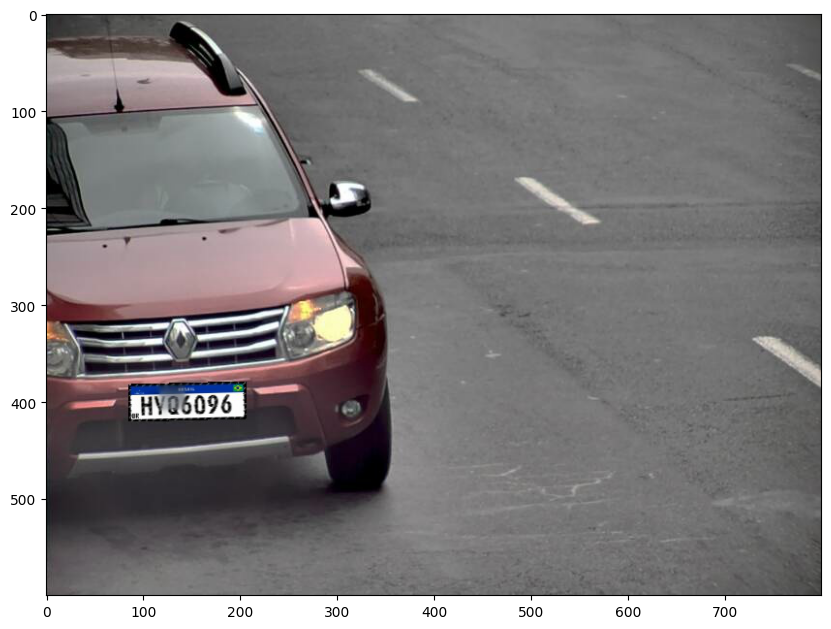

In [438]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [439]:
image_arr_224.shape

(224, 224, 3)

In [440]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [441]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 136ms/step


array([[0.5027472 , 0.5269483 , 0.12691657, 0.06659774]], dtype=float32)

In [442]:
#coords = [[0.498125,0.536667,0.12625,0.046667]]
#coords

In [443]:
x_center = coords[0][0]
y_center = coords[0][1]
width = coords[0][2]
height = coords[0][3]

x_min = x_center - ( width/2)
x_max = x_center + ( width/2)
y_min = y_center - (height/2)
y_max = y_center + (height/2)
des_coords = [[x_min, x_max,y_min,y_max]]
des_coords

[[0.439288891851902,
  0.5662054643034935,
  0.4936494007706642,
  0.5602471455931664]]

In [444]:
# denormalize the values
denorm = np.array([w,w,h,h])
coor = des_coords * denorm
coor

array([[351.43111348, 452.96437144, 296.18964046, 336.14828736]])

In [445]:
# draw bounding on top the image
xmin,xmax,ymin,ymax = coor[0]
pt1 =(int(xmin),int(ymin))
pt2 =(int(xmax),int(ymax))
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
#cv2.rectangle(image1,pt1,pt2,(0,255,0),3)


(351, 296) (452, 336)


array([[[10, 14, 13],
        [37, 41, 40],
        [46, 50, 49],
        ...,
        [74, 74, 72],
        [74, 74, 72],
        [73, 73, 71]],

       [[11, 15, 14],
        [37, 41, 40],
        [46, 50, 49],
        ...,
        [74, 74, 72],
        [73, 73, 71],
        [73, 73, 71]],

       [[12, 16, 15],
        [38, 42, 41],
        [45, 49, 48],
        ...,
        [73, 73, 71],
        [72, 72, 70],
        [72, 72, 70]],

       ...,

       [[66, 62, 63],
        [89, 85, 86],
        [95, 91, 92],
        ...,
        [69, 69, 67],
        [70, 70, 68],
        [71, 71, 69]],

       [[66, 62, 63],
        [89, 85, 86],
        [94, 90, 91],
        ...,
        [65, 65, 63],
        [67, 67, 65],
        [69, 69, 67]],

       [[74, 70, 71],
        [96, 92, 93],
        [99, 95, 96],
        ...,
        [63, 63, 61],
        [64, 64, 62],
        [67, 67, 65]]], dtype=uint8)

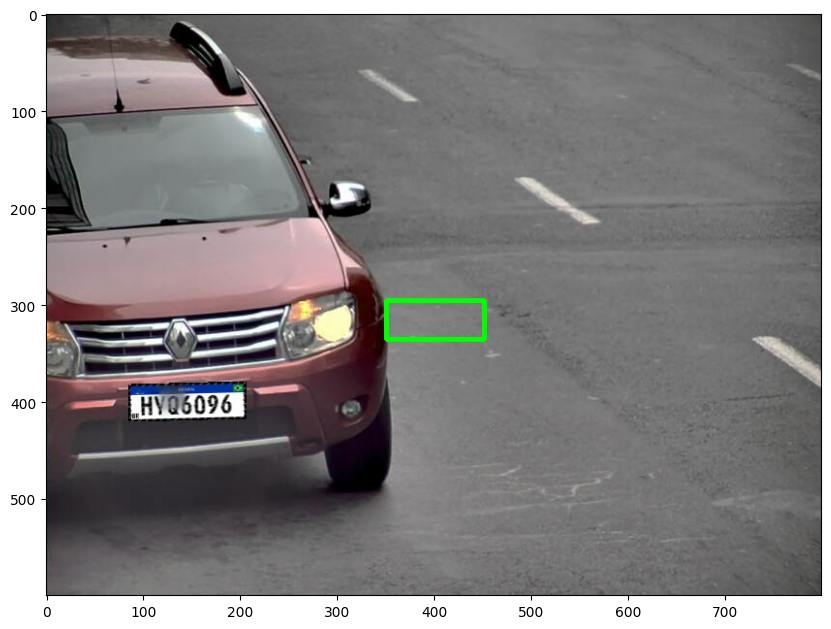

In [446]:
plt.figure(figsize=(10,8))
plt.imshow(image)
#plt.imshow(image1)
plt.show()

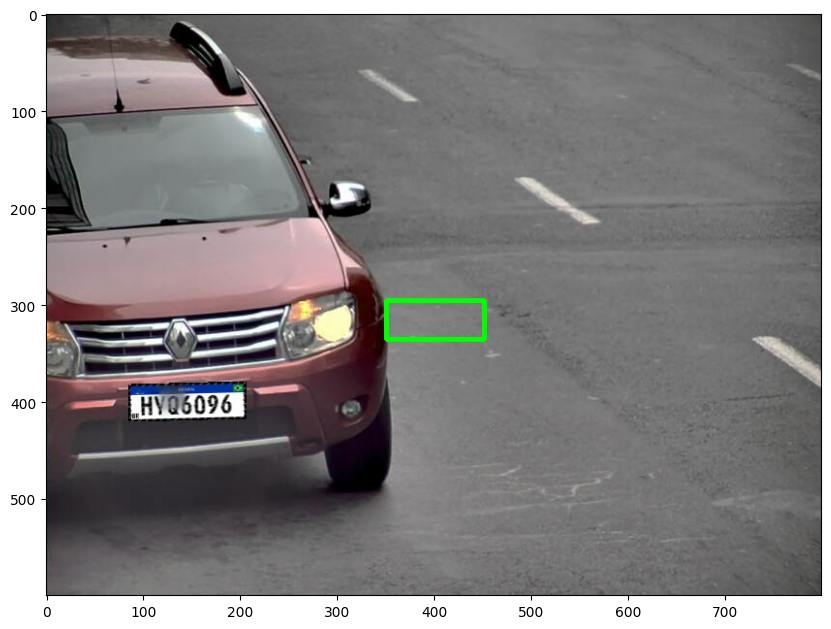

In [447]:
plt.figure(figsize=(10,8))
plt.imshow(image)
#plt.imshow(image1)
plt.show()

In [448]:
#coords = [[0.547049,0.61194,0.28657,0.173134]]
coords

array([[0.5027472 , 0.5269483 , 0.12691657, 0.06659774]], dtype=float32)

In [449]:
x_center = coords[0][0]
y_center = coords[0][1]
width = coords[0][2]
height = coords[0][3]

x_min = x_center - ( width/2)
x_max = x_center + ( width/2)
y_min = y_center - (height/2)
y_max = y_center + (height/2)
des_coords = [[x_min, x_max,y_min,y_max]]
des_coords

[[0.439288891851902,
  0.5662054643034935,
  0.4936494007706642,
  0.5602471455931664]]

In [450]:
# denormalize the values
denorm = np.array([w,w,h,h])
coor = des_coords * denorm
coor

array([[351.43111348, 452.96437144, 296.18964046, 336.14828736]])

In [451]:
# draw bounding on top the image
xmin,xmax,ymin,ymax = coor[0]
pt1 =(int(xmin),int(ymin))
pt2 =(int(xmax),int(ymax))
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
#cv2.rectangle(image1,pt1,pt2,(0,255,0),3)

(351, 296) (452, 336)


array([[[10, 14, 13],
        [37, 41, 40],
        [46, 50, 49],
        ...,
        [74, 74, 72],
        [74, 74, 72],
        [73, 73, 71]],

       [[11, 15, 14],
        [37, 41, 40],
        [46, 50, 49],
        ...,
        [74, 74, 72],
        [73, 73, 71],
        [73, 73, 71]],

       [[12, 16, 15],
        [38, 42, 41],
        [45, 49, 48],
        ...,
        [73, 73, 71],
        [72, 72, 70],
        [72, 72, 70]],

       ...,

       [[66, 62, 63],
        [89, 85, 86],
        [95, 91, 92],
        ...,
        [69, 69, 67],
        [70, 70, 68],
        [71, 71, 69]],

       [[66, 62, 63],
        [89, 85, 86],
        [94, 90, 91],
        ...,
        [65, 65, 63],
        [67, 67, 65],
        [69, 69, 67]],

       [[74, 70, 71],
        [96, 92, 93],
        [99, 95, 96],
        ...,
        [63, 63, 61],
        [64, 64, 62],
        [67, 67, 65]]], dtype=uint8)

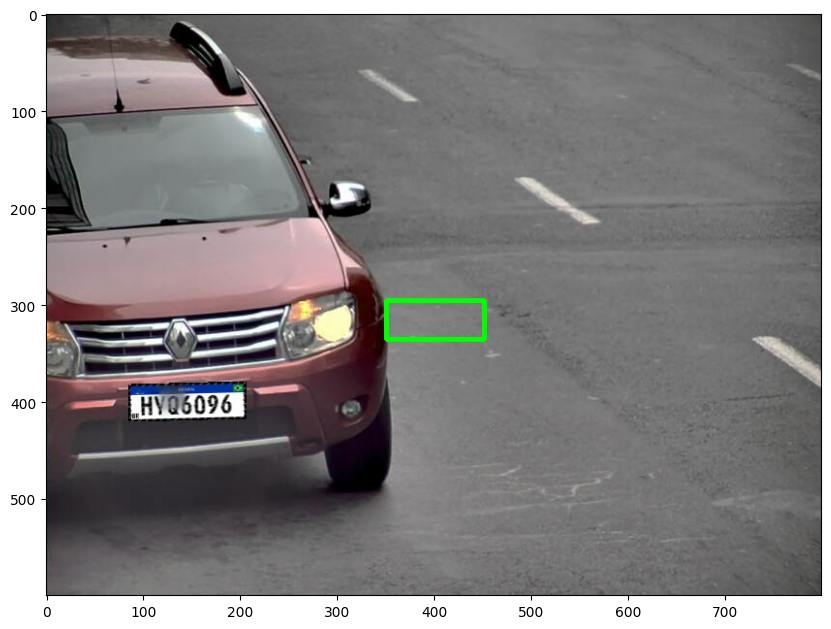

In [452]:
plt.figure(figsize=(10,8))
plt.imshow(image)
#plt.imshow(image1)
plt.show()

In [453]:
#path = './test_images/N12.jpeg'
#path = './test_images/N66.jpeg'
#path = './test_images/test1.jpeg'
#path = './brasil/monitoring_system_1221.JPG'
#path = './brasil/monitoring_system_1222.JPG'
#path = './brasil/monitoring_system_1223.JPG'
#path = './brasil/monitoring_system_1224.JPG'
#path = './brasil/cropped_parking_lot_154.JPG'
#path = './brasil/cropped_parking_lot_155.JPG'
#path = './brasil/cropped_parking_lot_156.JPG'
#path = './brasil/cropped_parking_lot_157.JPG'
#path = './brasil/parking_lot1_515.JPG'

In [454]:
def getImagenCordenadas(path):
    image1 = load_img(path,target_size=(224,224))
    image_arr_224 = img_to_array(image1)/255.0 
    test_arr = image_arr_224.reshape(1,224,224,3) 
    
    # hacemos la prediccion
    coords = model.predict(test_arr) 
    
    x_center = coords[0][0]
    y_center = coords[0][1]
    width = coords[0][2]
    height = coords[0][3]

    x_min = x_center - ( width/2)
    x_max = x_center + ( width/2)
    y_min = y_center - (height/2)
    y_max = y_center + (height/2)
    
    des_coords = [[x_min, x_max,y_min,y_max]] 
    denorm = np.array([w,w,h,h])
    coor = des_coords * denorm 
    xmin,xmax,ymin,ymax = coor[0]
    pt1 =(int(xmin),int(ymin))
    pt2 =(int(xmax),int(ymax))
    #print(pt1, pt2) 
    cv2.rectangle(image,pt1,pt2,(0,255,0),3) 
   
    return image,pt1,pt2

In [455]:
getImagenCordenadas(path)

1/1 [==============================] - 0s 123ms/step


(array([[[10, 14, 13],
         [37, 41, 40],
         [46, 50, 49],
         ...,
         [74, 74, 72],
         [74, 74, 72],
         [73, 73, 71]],
 
        [[11, 15, 14],
         [37, 41, 40],
         [46, 50, 49],
         ...,
         [74, 74, 72],
         [73, 73, 71],
         [73, 73, 71]],
 
        [[12, 16, 15],
         [38, 42, 41],
         [45, 49, 48],
         ...,
         [73, 73, 71],
         [72, 72, 70],
         [72, 72, 70]],
 
        ...,
 
        [[66, 62, 63],
         [89, 85, 86],
         [95, 91, 92],
         ...,
         [69, 69, 67],
         [70, 70, 68],
         [71, 71, 69]],
 
        [[66, 62, 63],
         [89, 85, 86],
         [94, 90, 91],
         ...,
         [65, 65, 63],
         [67, 67, 65],
         [69, 69, 67]],
 
        [[74, 70, 71],
         [96, 92, 93],
         [99, 95, 96],
         ...,
         [63, 63, 61],
         [64, 64, 62],
         [67, 67, 65]]], dtype=uint8),
 (351, 296),
 (452, 336))

In [456]:
#pip install --upgrade pytesseract

In [457]:
import pytesseract as pt


1/1 [==============================] - 0s 131ms/step


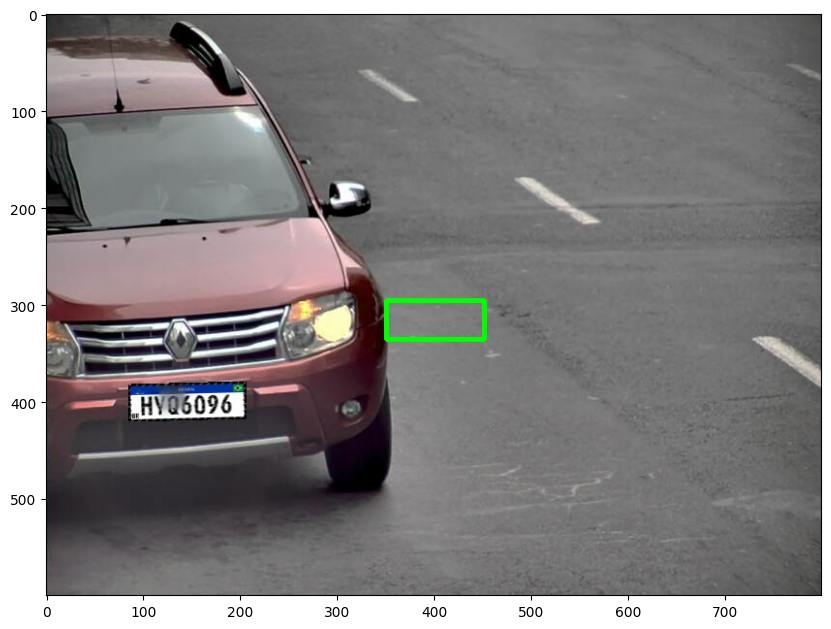

In [458]:
image, punto1, punto2  = getImagenCordenadas(path)
plt.figure(figsize=(10,8))
plt.imshow(image) 
plt.show()

In [459]:
punto1, punto2

((351, 296), (452, 336))

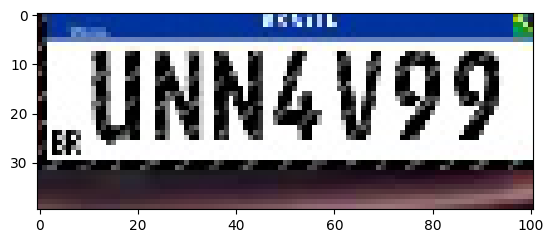

In [460]:
lamda = 0
img = np.array(load_img(path))
(xmin , ymin   ), (xmax , ymax ) = punto1, punto2
xmin = xmin - lamda
ymin = ymin - lamda
xmax = xmax + lamda
ymax = ymax + lamda
extracto = img[ ymin:ymax, xmin:xmax]
plt.imshow(extracto)
plt.show()

In [461]:
from PIL import Image
extracto_pil = Image.fromarray(np.uint8(extracto))
extracto_pil.save("imagen_cortada.jpg")
 

In [462]:
import cv2
import pytesseract

imageX = cv2.imread("./imagen_cortada.jpg", cv2.IMREAD_GRAYSCALE)




In [463]:
# Corregir el uso de cv2.dilate()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
imageX = cv2.dilate(imageX, kernel)
# Corregir el uso de pytesseract.image_to_string()    
text = pytesseract.image_to_string(imageX, config='--psm 7') 
print(text)

a



In [464]:
text = pt.image_to_string(imageX, lang='spa')

In [465]:
print(text)

In [466]:
import numpy as np
import cv2 
from PIL import Image
from PIL import ImageFilter 
 

In [467]:
print(text)

In [468]:
print(pt.pytesseract.tesseract_cmd)

tesseract


1/1 [==============================] - 0s 127ms/step


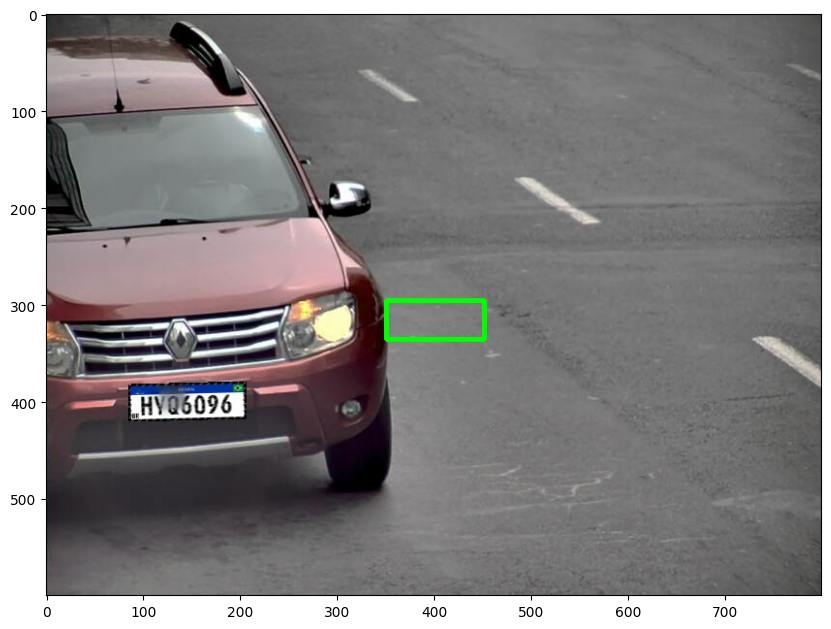

In [469]:
imagenOriginal, punto1, punto2  = getImagenCordenadas(path)
plt.figure(figsize=(10,8))
plt.imshow(imagenOriginal) 
plt.show()

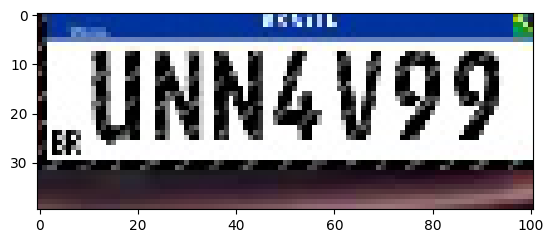

In [470]:
#cortar placa segun cordenadas en la imagen original
img = np.array(load_img(path))
(xmin, ymin ), (xmax, ymax) = punto1, punto2
extracto = img[ ymin:ymax, xmin:xmax]
plt.imshow(extracto)
plt.show()




In [471]:
#API OCR
import requests
import json

def ocr_space_file(filename, overlay=False, api_key='K88171938188957', language='eng'): 
    payload = {'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               }
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload,
                          )
    return r.content.decode() 

In [472]:
response_json = ocr_space_file(filename='./imagen_cortada.jpg', language='eng')

In [473]:
response_json

'{"ParsedResults":[{"TextOverlay":{"Lines":[],"HasOverlay":false,"Message":"Text overlay is not provided as it is not requested"},"TextOrientation":"0","FileParseExitCode":1,"ParsedText":"VUNN4V99\\r\\n","ErrorMessage":"","ErrorDetails":""}],"OCRExitCode":1,"IsErroredOnProcessing":false,"ProcessingTimeInMilliseconds":"937","SearchablePDFURL":"Searchable PDF not generated as it was not requested."}'

In [474]:
# Convertir la cadena JSON en un diccionario de Python
response_dict = json.loads(response_json)

# Acceder a la clave "ParsedText" dentro del diccionario
parsed_text = response_dict['ParsedResults'][0]['ParsedText']

# Imprimir el valor de "ParsedText"
print(parsed_text)

VUNN4V99

